<a href="https://colab.research.google.com/github/pk142/DSML/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Jamboree_Admission.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Problem Statement:
The problem involves predicting the chance of admission for graduate students based on various attributes such as GRE scores, TOEFL scores, university rating, statement of purpose (SOP), letter of recommendation (LOR), undergraduate GPA (CGPA), research experience, etc.


**Exploratory Data Analysis (EDA):**

In [5]:
# Display the first few rows of the dataset
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Check the data types of all attributes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# Check for missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Display summary statistics
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

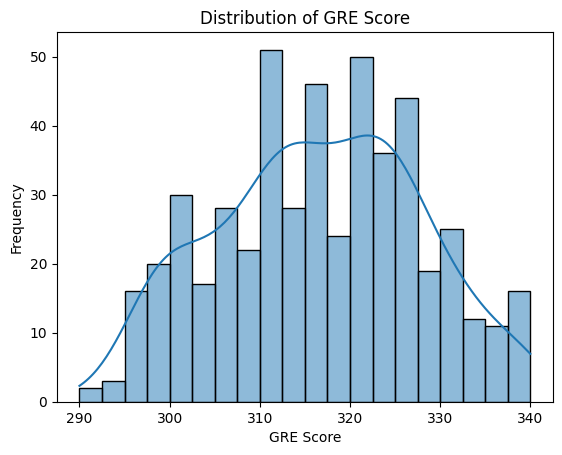

In [10]:
# Distribution plots for continuous variables
sns.histplot(df['GRE Score'], bins=20, kde=True)
plt.title('Distribution of GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()

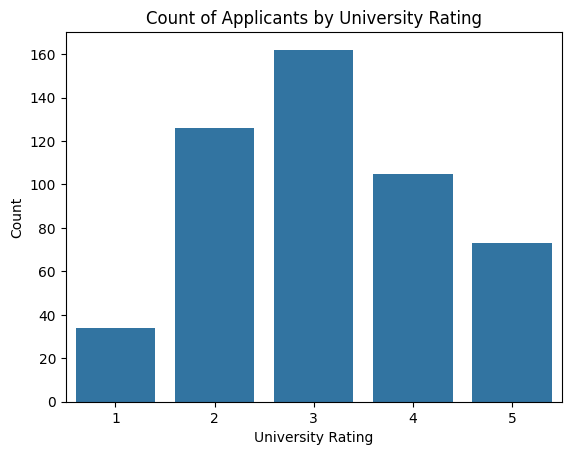

In [11]:
# Barplot for categorical variables
sns.countplot(x='University Rating', data=df)
plt.title('Count of Applicants by University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()


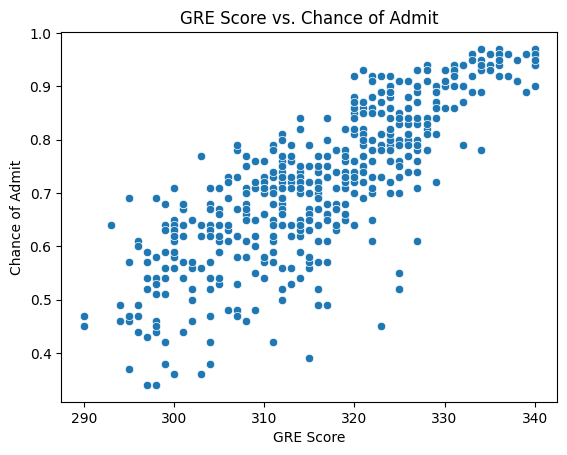

In [12]:
# Scatter plot for GRE Score vs. Chance of Admit
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title('GRE Score vs. Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

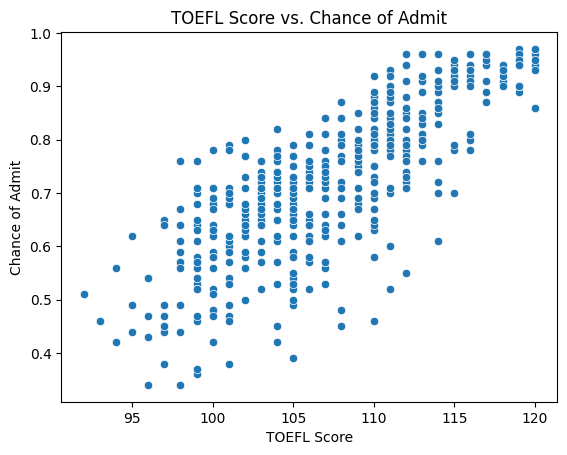

In [13]:
# Scatter plot for TOEFL Score vs. Chance of Admit
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df)
plt.title('TOEFL Score vs. Chance of Admit')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.show()


 **Comments and Insights:**


*   The dataset consists of numerical attributes like GRE Score, TOEFL Score, SOP, LOR, CGPA, and categorical attributes like University Rating and Research.
*   There are no missing values in the dataset.

*   GRE Score and TOEFL Score show a positive correlation with the Chance of Admit.
*   University Rating seems to influence the Chance of Admit positively.

*   Research experience may also play a role in increasing the Chance of Admit.
*   CGPA has a strong positive correlation with the Chance of Admit.








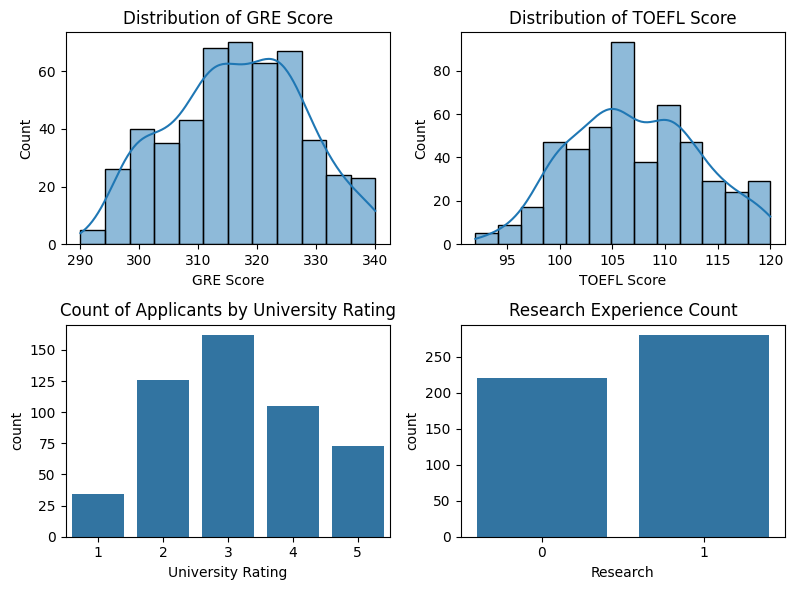

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots for continuous variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df['GRE Score'], kde=True)
plt.title('Distribution of GRE Score')

plt.subplot(2, 3, 2)
sns.histplot(df['TOEFL Score'], kde=True)
plt.title('Distribution of TOEFL Score')

# Add more plots for other variables (SOP, LOR, CGPA, Research, Chance of Admit)

# Barplots for categorical variables
plt.subplot(2, 3, 4)
sns.countplot(x='University Rating', data=df)
plt.title('Count of Applicants by University Rating')

plt.subplot(2, 3, 5)
sns.countplot(x='Research', data=df)
plt.title('Research Experience Count')

plt.tight_layout()
plt.show()


In [15]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [16]:
# Example: Interaction between GRE Score and TOEFL Score
df['GRE_TOEFL_Interact'] = df['GRE Score'] * df['TOEFL Score']


In [18]:
# Example: Grouping all the scores into a single feature
df['Total_Scores'] = df['GRE Score'] + df['TOEFL Score'] + df['CGPA']


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display model coefficients with column names
coefficients_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print("\nLinear Regression Coefficients:")
print(coefficients_lr)



Linear Regression Coefficients:
              Feature  Coefficient
0          Serial No.     0.000088
1           GRE Score    -0.026411
2         TOEFL Score    -0.016491
3   University Rating     0.002881
4                 SOP     0.004209
5                LOR      0.014564
6                CGPA     0.076269
7            Research     0.022365
8  GRE_TOEFL_Interact    -0.000042
9        Total_Scores     0.033368


In [29]:
# Build Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Model Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display model coefficients with column names
coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
print("\nRidge Regression Coefficients:")
print(coefficients_ridge)



Ridge Regression Coefficients:
              Feature  Coefficient
0          Serial No.     0.000089
1           GRE Score    -0.025796
2         TOEFL Score    -0.015173
3   University Rating     0.003039
4                 SOP     0.004444
5                LOR      0.014676
6                CGPA     0.074138
7            Research     0.022027
8  GRE_TOEFL_Interact    -0.000045
9        Total_Scores     0.033170


In [30]:
# Build Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Model Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display model coefficients with column names
coefficients_lasso = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("\nLasso Regression Coefficients:")
print(coefficients_lasso)



Lasso Regression Coefficients:
              Feature  Coefficient
0          Serial No.      0.00008
1           GRE Score      0.00000
2         TOEFL Score     -0.00000
3   University Rating      0.00000
4                 SOP      0.00000
5                LOR       0.00000
6                CGPA      0.00000
7            Research      0.00000
8  GRE_TOEFL_Interact      0.00004
9        Total_Scores      0.00000


**Linear Regression:**
*  Good academic scores like GRE, TOEFL, and CGPA  increase the chance of admission.
*   Having research experience also helps in getting admitted.

*   Other factors like university rating, statement of purpose (SOP), and letter of recommendation (LOR) play smaller roles.
*   
The interaction between GRE and TOEFL scores doesn't seem to matter much.

**Ridge Regression:**
*   Similar to Linear Regression, academic scores and research experience are important.
*   
Ridge Regression helps in reducing overfitting by slightly shrinking the coefficients.

**Lasso Regression:**
*   Lasso Regression selects the most important features and sets less important ones to zero.
*  It suggests that some features like university rating, SOP, and LOR may not be very important.

*   The interaction between GRE and TOEFL scores remains important according to Lasso.









In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Drop variables with VIF greater than 5
while vif_data["VIF"].max() > 5:
    max_vif_index = vif_data["VIF"].idxmax()
    column_to_drop = vif_data.loc[max_vif_index, "Feature"]
    X = X.drop(columns=[column_to_drop])
    vif_data = vif_data.drop(max_vif_index)


In [33]:
# Calculate residuals
residuals = y_test - y_pred_lr

# Check the mean of residuals
mean_residuals = residuals.mean()


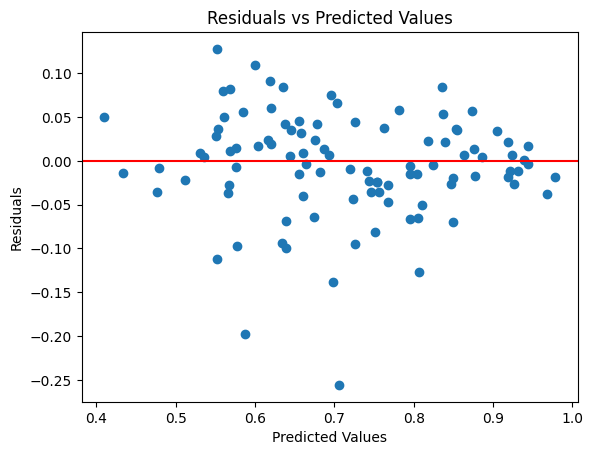

In [34]:
# Plot residuals vs predicted values
plt.scatter(y_pred_lr, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [36]:
import statsmodels.api as sm

# Add a constant column to X_test
X_test_with_const = sm.add_constant(X_test)

# Perform Breusch-Pagan test
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_test_with_const)


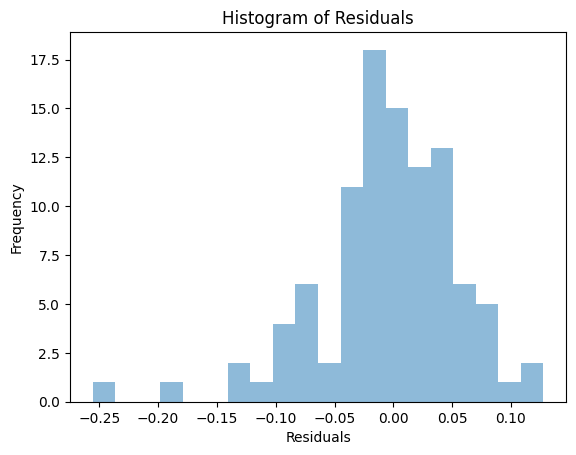

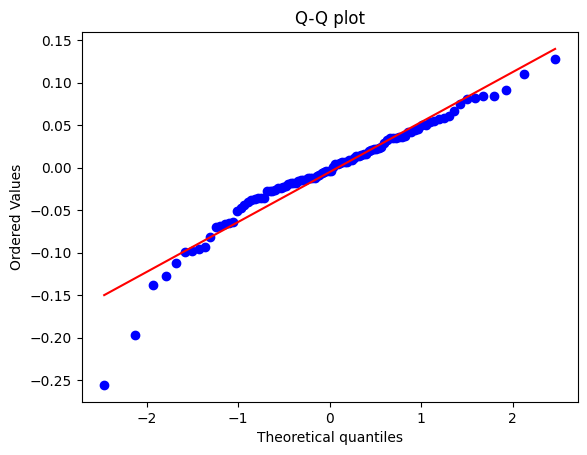

In [38]:
# Plot histogram of residuals
plt.hist(residuals, bins=20, alpha=0.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Use Q-Q plot for normality
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()



In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training and testing data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics: MAE, RMSE, R2
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Adjusted R2 calculation
n = len(X_train)
p = len(X_train.columns)
adj_r2_train = 1 - (1 - train_r2) * ((n - 1) / (n - p - 1))
adj_r2_test = 1 - (1 - test_r2) * ((n - 1) / (n - p - 1))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
# Print the calculated metrics
print("Metrics for Linear Regression Model:")
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Adjusted R2 (Train):", adj_r2_train)
print("Adjusted R2 (Test):", adj_r2_test)

Metrics for Linear Regression Model:
Train MAE: 0.04219772697192258
Test MAE: 0.043250564646383785
Train RMSE: 0.05803296747717703
Test RMSE: 0.059855718148028335
Train R2: 0.8291209001347354
Test R2: 0.8248065039111878
Adjusted R2 (Train): 0.8247281212178905
Adjusted R2 (Test): 0.820302815065717


**Mean Absolute Error (MAE):**
Train MAE: 0.042
Test MAE: 0.043

**Insight:** On average, our model's predictions are off by about 0.042 (train) and 0.043 (test) from the actual values. Lower values indicate better accuracy.

**Root Mean Squared Error (RMSE):**
Train RMSE: 0.058
Test RMSE: 0.060

**Insight:** The root mean squared error gives us a measure of the average size of the errors in our predictions. Our model's predictions are off by about 0.058 (train) and 0.060 (test) on average.

**R-squared (R2):**
Train R2: 0.829
Test R2: 0.825

**Insight:** R-squared measures how well the model explains the variability of the target variable. Our model explains about 82.9% (train) and 82.5% (test) of the variance in the target variable.

**Adjusted R-squared:**
Train Adjusted R2: 0.825
Test Adjusted R2: 0.820

**Insight:** Adjusted R-squared adjusts for the number of predictors in the model. It's similar to R-squared but penalizes for adding unnecessary variables. Our adjusted R2 values are slightly lower than R2, indicating that the model is reliable and not overly complex.


**Overall Insight:**


*   The model performs consistently well on both training and testing datasets.

*   The MAE and RMSE values are relatively low, indicating good accuracy.
*   The R2 and adjusted R2 values are high, suggesting that the model explains most of the variability in the target variable.


*   There's no significant difference between train and test metrics, indicating that the model generalizes well to unseen data.

# **Insights from the Data:**
**High Academic Performance:** Applicants have strong academic credentials, including high GRE and TOEFL scores, indicating their proficiency in standardized testing.

**University Ratings:** Applicants are applying to universities with ratings ranging from moderate to high, suggesting a preference for reputable institutions.

**Recommendation Letters and Statements:** Applicants submit strong recommendation letters and statements of purpose, highlighting their qualifications and motivations for graduate studies.

**Research Experience:** Some applicants have research experience, which may positively impact their chances of admission, showing their dedication to academic pursuits.

***Recommendations:***

**Emphasize Holistic Evaluation:** Admissions committees should consider various factors beyond test scores, such as research experience and personal statements, to assess applicants comprehensively.

**Promote Diversity:** Institutions should prioritize diversity and inclusivity by considering applicants from diverse backgrounds, fostering a rich and vibrant learning environment.

**Continuous Improvement:** Regular review and refinement of admission processes are essential to ensure fairness, transparency, and effectiveness in selecting qualified candidates.